In [22]:
# Import Additional Libraries For Optimization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import mnist
from keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
# Load and Preprocess MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize The Pixel Values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Improved Preprocessing (Adds Slight Complexity Reduction)
train_images = train_images.reshape(-1, 28, 28, 1)  # Add Channel Dimension
test_images = test_images.reshape(-1, 28, 28, 1)

In [24]:
# Build OPTIMIZED ANN model
optimized_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Reduced units + L2 regularization
    layers.Dropout(0.3),  # Add Dropout For Regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\nisha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Compile With Adjusted Learning Rate
optimized_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Add Callbacks For Early Stopping And Learning Rate Reduction
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=2)
]

In [27]:
# Train Optimized Model
optimized_history = optimized_model.fit(
    train_images, train_labels,
    epochs=20,  # Increased Epochs But Early Stopping Will Intervene
    batch_size=64,  # Adjusted Batch Size
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7319 - loss: 0.9586 - val_accuracy: 0.9398 - val_loss: 0.2859 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9181 - loss: 0.3568 - val_accuracy: 0.9533 - val_loss: 0.2369 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9303 - loss: 0.3011 - val_accuracy: 0.9592 - val_loss: 0.2055 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9379 - loss: 0.2735 - val_accuracy: 0.9597 - val_loss: 0.2005 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.2541 - val_accuracy: 0.9632 - val_loss: 0.1858 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9413 - loss: 0.2496 - val_accuracy: 0.9654 - val_loss: 0.1742 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9483 - loss: 0.2303 - 

In [28]:

# Evaluate Optimized Model
test_loss_opt, test_acc_opt = optimized_model.evaluate(test_images, test_labels)
print(f"Test Accuracy (Optimized Model) : {test_acc_opt:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.9638 - loss: 0.1773
Test Accuracy (Optimized Model) : 0.9701


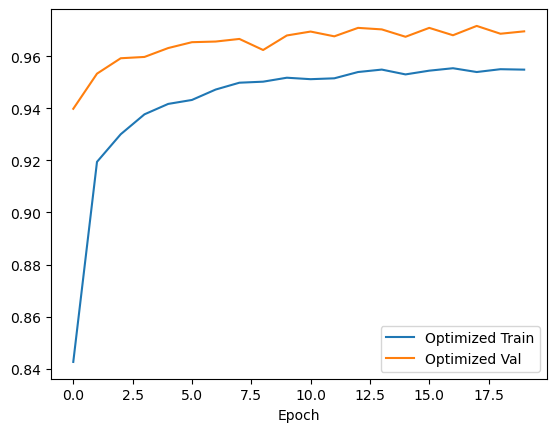

In [29]:
# Plot Comparison
plt.plot(optimized_history.history['accuracy'], label='Optimized Train')
plt.plot(optimized_history.history['val_accuracy'], label='Optimized Val')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
# Build ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Input Layer
    layers.Dense(128, activation='relu'),  # Hidden Layer 1
    layers.Dense(64, activation='relu'),   # Hidden Layer 2
    layers.Dense(10, activation='softmax') # Output Layer
])

# Compile The model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train The model
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8688 - loss: 0.4574 - val_accuracy: 0.9561 - val_loss: 0.1476
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9665 - loss: 0.1112 - val_accuracy: 0.9682 - val_loss: 0.1076
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - loss: 0.0739 - val_accuracy: 0.9712 - val_loss: 0.1005
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0535 - val_accuracy: 0.9718 - val_loss: 0.0967
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.9694 - val_loss: 0.1127


In [35]:
# Print complexity comparison
print("\nModel Complexity Comparison :")
print(f"Core Model Params : {model.count_params():,}")
print(f"Optimized Model Params : {optimized_model.count_params():,}")


Model Complexity Comparison :
Core Model Params : 109,386
Optimized Model Params : 52,650
